# DL Assignement

### Roll Number :: 232797
### Name :: Muhammad Usama

# Instructor: Dr. M. Fiza Murtza


In [1]:
import pandas as pd
# Set pandas display options
pd.set_option('display.width', 600)  
df0=pd.read_csv('features_v1')
df0=df0.rename(columns={'Unnamed: 0':'id'})
target=pd.read_csv("target")
target=target.rename(columns={'Unnamed: 0':'id'})
target=target.rename(columns={'NObeyesdad':'label'})
df=pd.merge(df0, target, on='id',how='left')
print(df.head())
print("The value count for the target variable")
df.value_counts('label') # output label is encoded in following way:
                                #'Insufficient_Weight' : 0,
                                #'Normal_Weight' : 1,
                                #'Overweight_Level_I' : 2,
                                #'Overweight_Level_II' : 3,
                                #'Obesity_Type_I' : 4,
                                #'Obesity_Type_II' : 5,
                                #'Obesity_Type_III' : 6
                            

   id  Gender  family_history_with_overweight  FAVC  CAEC  SMOKE  SCC  CALC  MTRANS       Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE        BMI  label
0   0       0                               1     0     2      0    0     3       3  0.148936  0.320755  0.186567   0.5  0.666667   0.5  0.000000  0.5  24.386526      1
1   1       0                               1     0     2      1    1     2       3  0.148936  0.132075  0.126866   1.0  0.666667   1.0  1.000000  0.0  24.238227      1
2   2       1                               1     0     2      0    0     1       3  0.191489  0.660377  0.283582   0.5  0.666667   0.5  0.666667  0.5  23.765432      1
3   3       1                               0     0     2      0    0     1       4  0.276596  0.660377  0.358209   1.0  0.666667   0.5  0.666667  0.0  26.851852      2
4   4       1                               0     0     2      0    0     2       3  0.170213  0.622642  0.379104   0.5  0.000000   0.5  0.000000  0.0  28.

label
6    4370
5    3545
1    3369
4    3261
3    2812
0    2795
2    2717
Name: count, dtype: int64

In [2]:
df2 = df.drop('id', axis=1)
df_train = df2.sample(frac=0.7, random_state=0)
df_valid = df2.drop(df_train.index)
X_train = df_train.drop('label', axis=1)
X_valid = df_valid.drop('label', axis=1)
y_train = df_train['label']
y_valid = df_valid['label']
input_shape = [X_train.shape[1]]
print(input_shape)


[17]


In [3]:
# for multi class problem, you need to convert your labels in categorial form, there is a method for that:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)

y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=7)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 classes as per data clases are 7

# Compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy', 'Recall', 'Precision', 'AUC'])

# MODEL training
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
501/501 [==============================] - 20s 22ms/step - loss: 1.5896 - accuracy: 0.4067 - recall: 0.2787 - precision: 0.4998 - auc: 0.8001 - val_loss: 0.6740 - val_accuracy: 0.7685 - val_recall: 0.5506 - val_precision: 0.8725 - val_auc: 0.9689
Epoch 2/100
501/501 [==============================] - 6s 12ms/step - loss: 0.8913 - accuracy: 0.6198 - recall: 0.4743 - precision: 0.7148 - auc: 0.9313 - val_loss: 0.6101 - val_accuracy: 0.8333 - val_recall: 0.6754 - val_precision: 0.8922 - val_auc: 0.9762
Epoch 3/100
501/501 [==============================] - 6s 12ms/step - loss: 0.8101 - accuracy: 0.6662 - recall: 0.5406 - precision: 0.7420 - auc: 0.9437 - val_loss: 0.5477 - val_accuracy: 0.8225 - val_recall: 0.7040 - val_precision: 0.8785 - val_auc: 0.9777
Epoch 4/100
501/501 [==============================] - 6s 12ms/step - loss: 0.7712 - accuracy: 0.6810 - recall: 0.5666 - precision: 0.7549 - auc: 0.9490 - val_loss: 0.5177 - val_accuracy: 0.8268 - val_recall: 0.7429 - val_pre

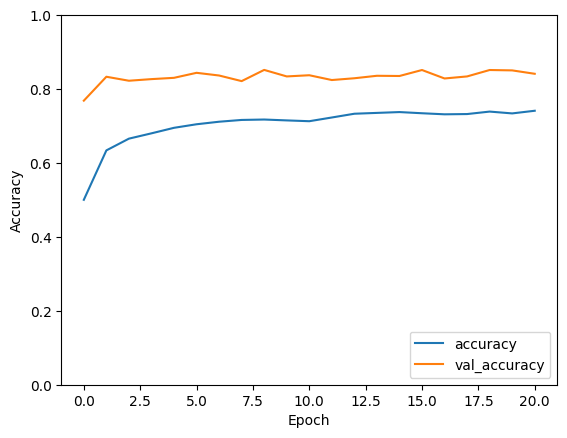

In [5]:
# Plot the history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [6]:
print(y_valid.shape)

(6861, 7)


In [7]:
model.evaluate(X_valid, y_valid, verbose=2)

215/215 - 2s - loss: 0.4485 - accuracy: 0.8515 - recall: 0.8010 - precision: 0.8837 - auc: 0.9842


[0.44852301478385925,
 0.8514793515205383,
 0.8010494112968445,
 0.8837433457374573,
 0.9842397570610046]

In [9]:
from sklearn.metrics import classification_report
# Model prediction
y_pred = model.predict(X_valid)
y_pred = y_pred.argmax(axis=1)  #

# Convert y_valid to class labels
y_valid_multiclass = y_valid.argmax(axis=1)

# classification report
print(classification_report(y_valid_multiclass, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       818
           1       0.84      0.77      0.81       986
           2       0.69      0.70      0.69       817
           3       0.66      0.74      0.70       821
           4       0.85      0.81      0.83      1020
           5       0.93      0.96      0.95      1077
           6       1.00      1.00      1.00      1322

    accuracy                           0.85      6861
   macro avg       0.84      0.84      0.84      6861
weighted avg       0.85      0.85      0.85      6861



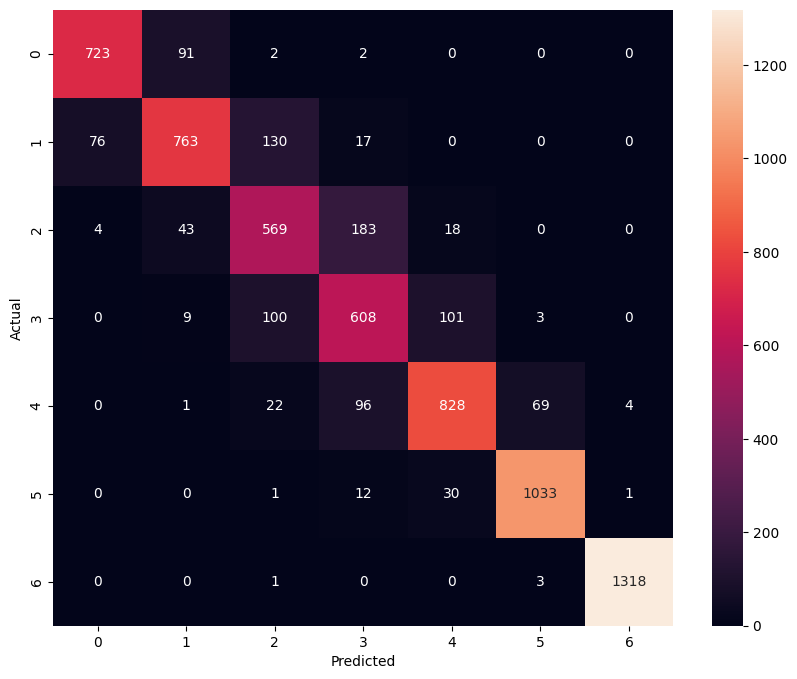

In [10]:
# plot confusion matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_valid, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()